In [1]:
import pandas as pd
pd.set_option('max_colwidth',100)
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from sklearn import preprocessing as pp
import pickle
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Plot Charts

In [2]:
couple_data = pd.read_pickle('./couple_data')

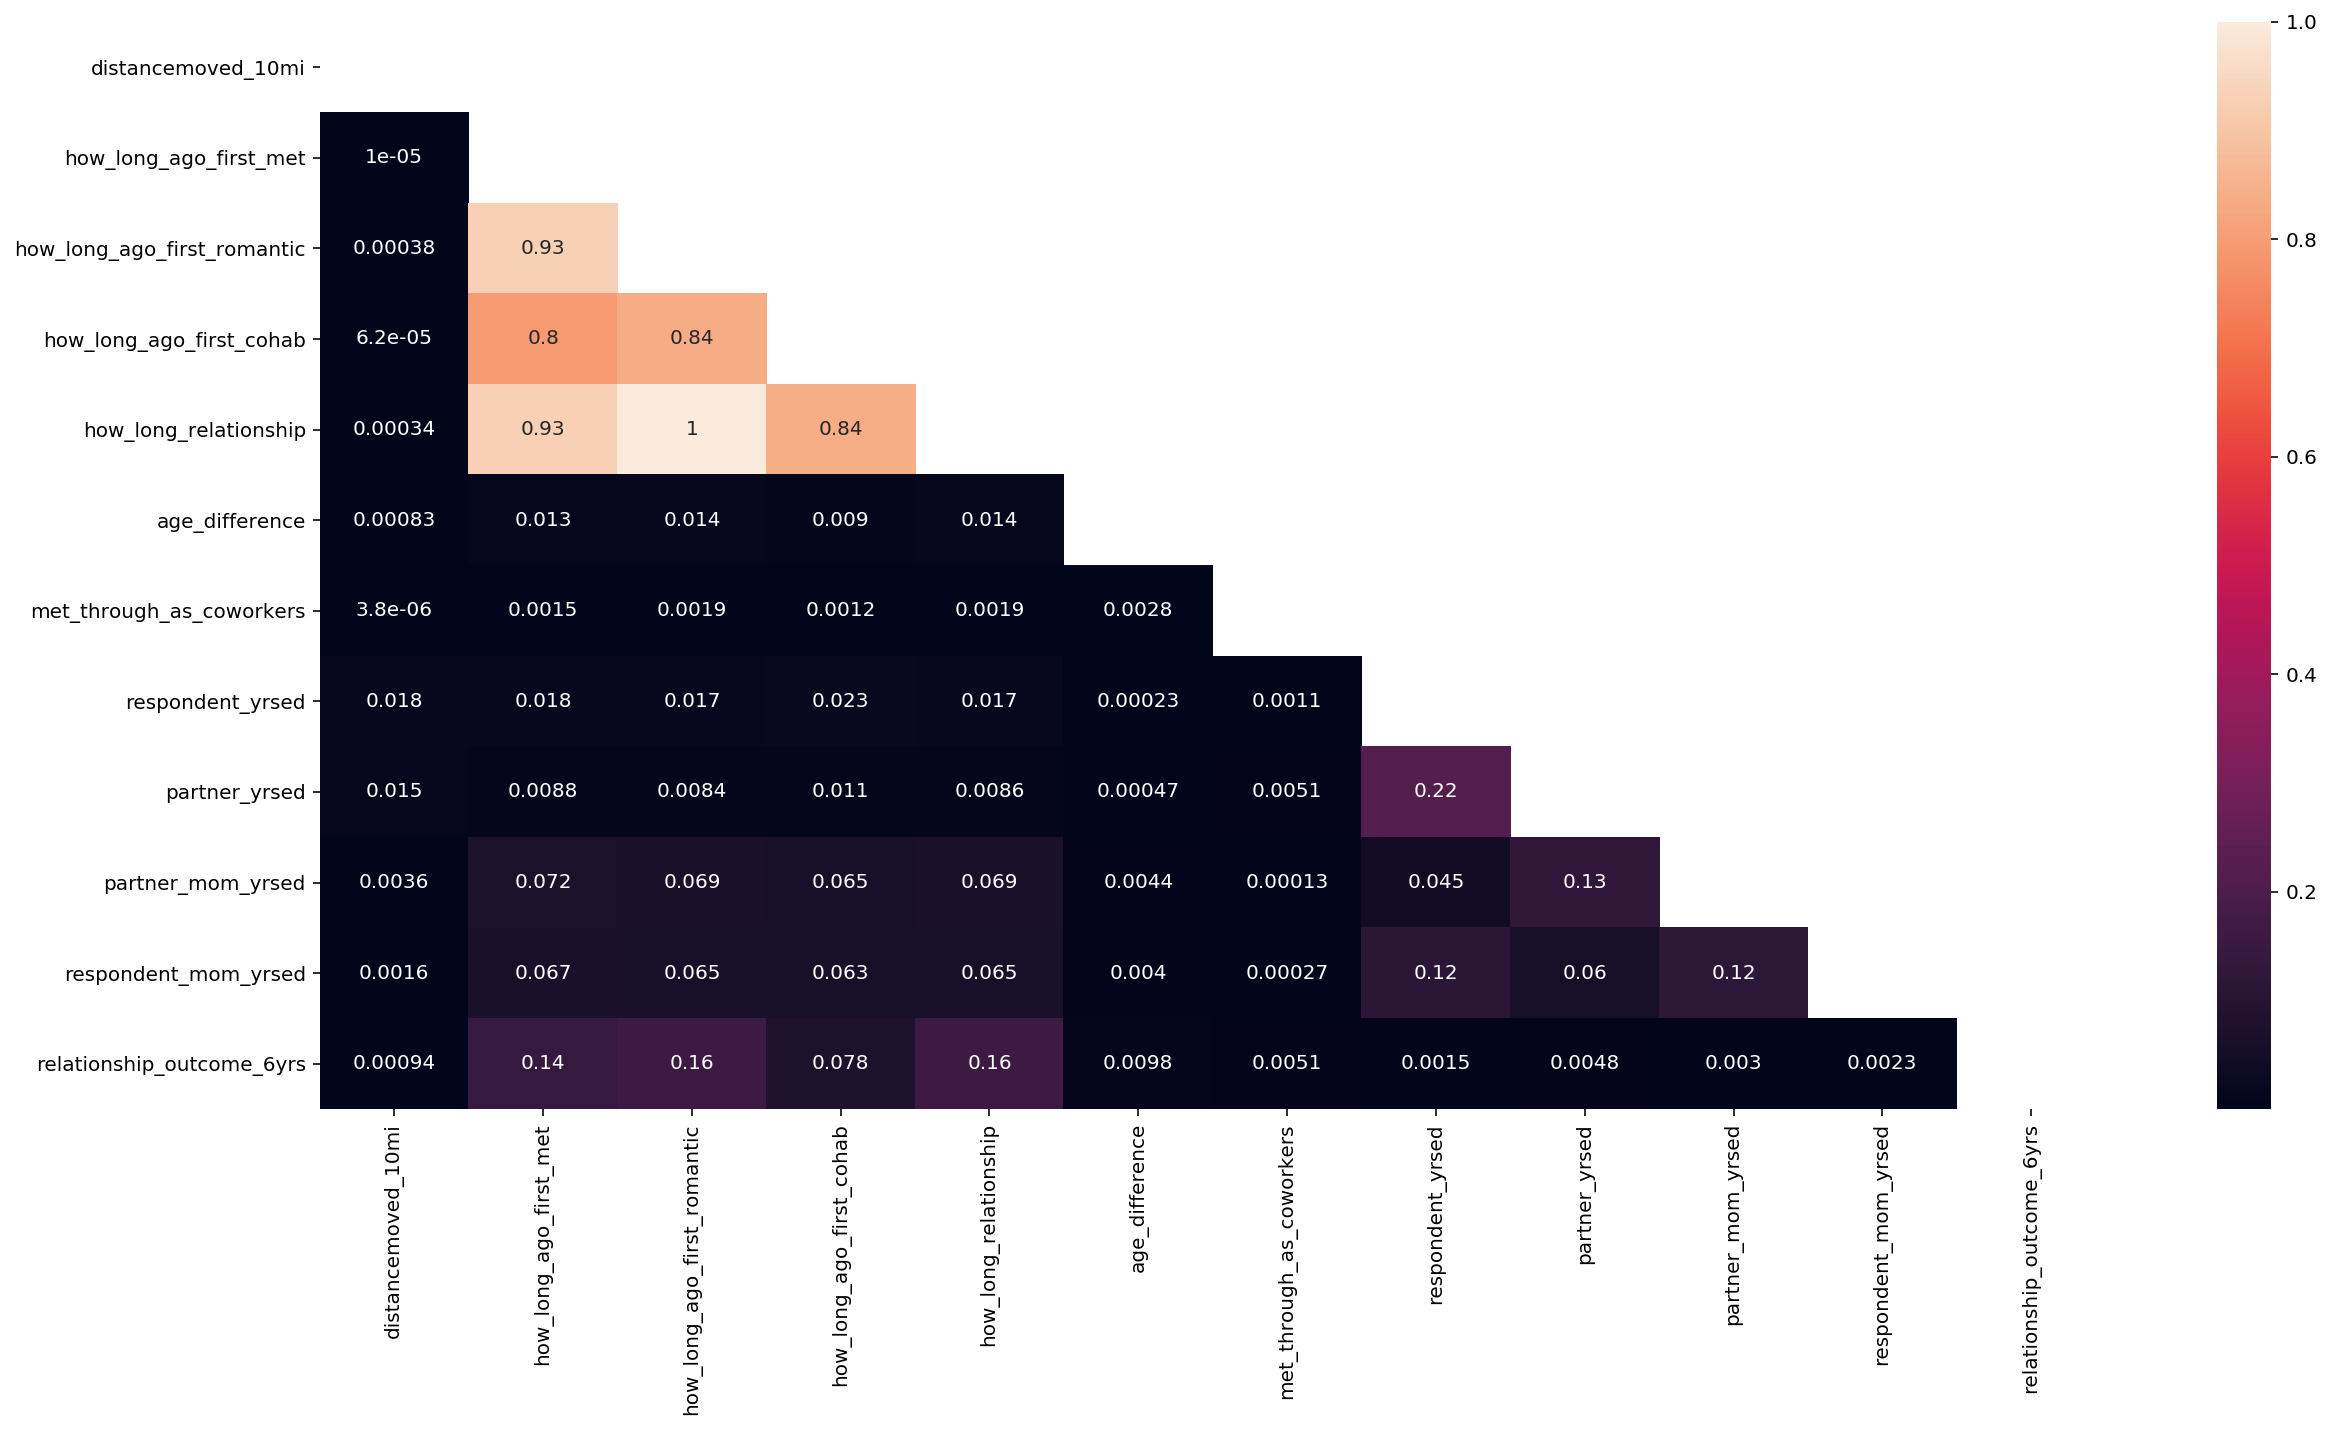

In [3]:
# See relationship for continuous features
plt.figure(figsize=(20,10))
couple_data_cont = couple_data.select_dtypes(include=['float32','float64','int64','int8'])
couple_data_cat = couple_data[[col for col in couple_data.columns if col not in couple_data_cont]]
corr = couple_data_cont.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr**2, mask=mask,annot=True)

In [4]:
# p value for highly correlated variables
print(sp.stats.pearsonr(couple_data['how_long_ago_first_met'], couple_data['how_long_relationship']))
print(sp.stats.pearsonr(couple_data['how_long_ago_first_met'], couple_data['how_long_ago_first_cohab']))
print(sp.stats.pearsonr(couple_data['how_long_ago_first_met'], couple_data['how_long_ago_first_romantic']))
print(sp.stats.pearsonr(couple_data['how_long_relationship'], couple_data['how_long_ago_first_romantic']))
print(sp.stats.pearsonr(couple_data['how_long_ago_first_cohab'], couple_data['how_long_ago_first_romantic']))
print(sp.stats.pearsonr(couple_data['how_long_ago_first_cohab'], couple_data['how_long_relationship']))

(0.96397185210540226, 0.0)
(0.89266288215645995, 0.0)
(0.96413106707755047, 0.0)
(0.99964731247755167, 0.0)
(0.91633225123066497, 0.0)
(0.91681590535604551, 0.0)


In [5]:
# P values are below 0.05, correlation between variables are statistically insignificant
# Do not need to remove them

In [6]:
couple_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1647 entries, 33536 to 4621371
Data columns (total 34 columns):
higher_income_earner            1647 non-null object
same_high_school                1647 non-null object
same_college_uni                1647 non-null object
grow_up_same_city_town          1647 non-null object
both_parents_knew_before_met    1647 non-null object
parent_alive                    1647 non-null object
met_partner_work                1647 non-null object
fam_intro_partner               1647 non-null object
friend_intro_partner            1647 non-null object
colleague_intro_partner         1647 non-null object
self_intro_partner              1647 non-null object
q24_met_online                  1647 non-null category
q24_school                      1647 non-null category
q24_college                     1647 non-null category
q24_church                      1647 non-null category
q24_vol_org                     1647 non-null category
q24_customer                    1

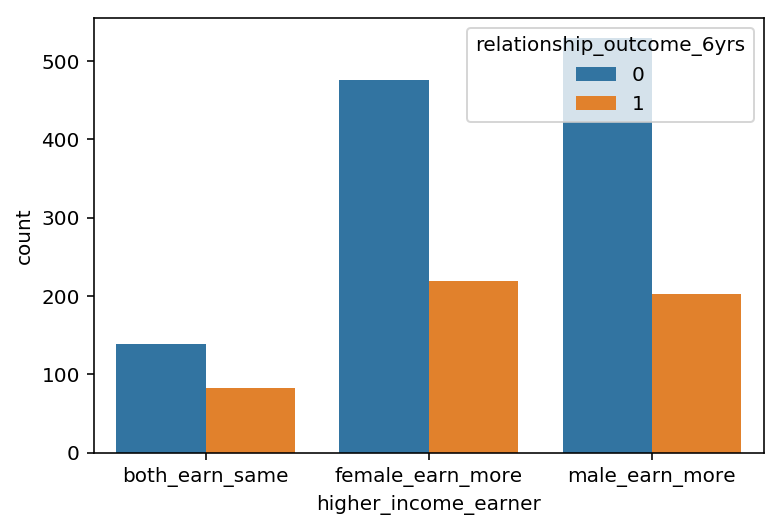

In [7]:
# income disparity between couples doesnt affect relationship outcome
sns.countplot(x=couple_data_cat['higher_income_earner'],hue=couple_data_cont['relationship_outcome_6yrs'])

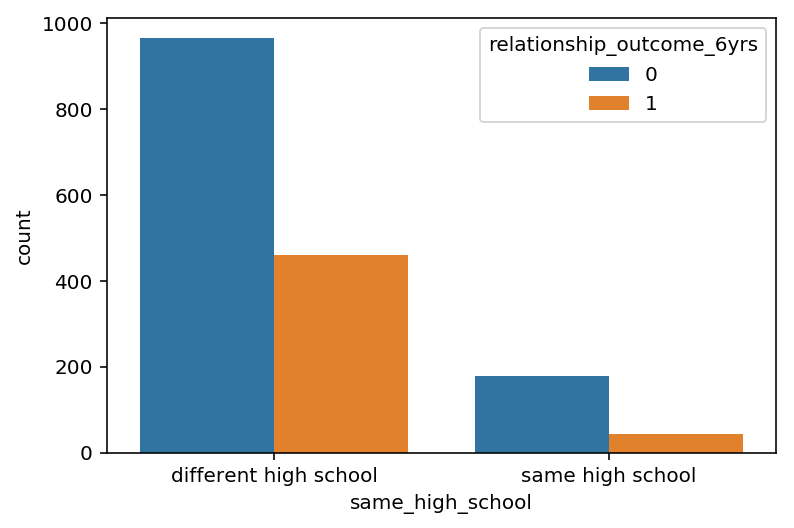

In [8]:
# same high school doesnt affect relationship outcome
sns.countplot(x=couple_data_cat['same_high_school'],hue=couple_data_cont['relationship_outcome_6yrs'])

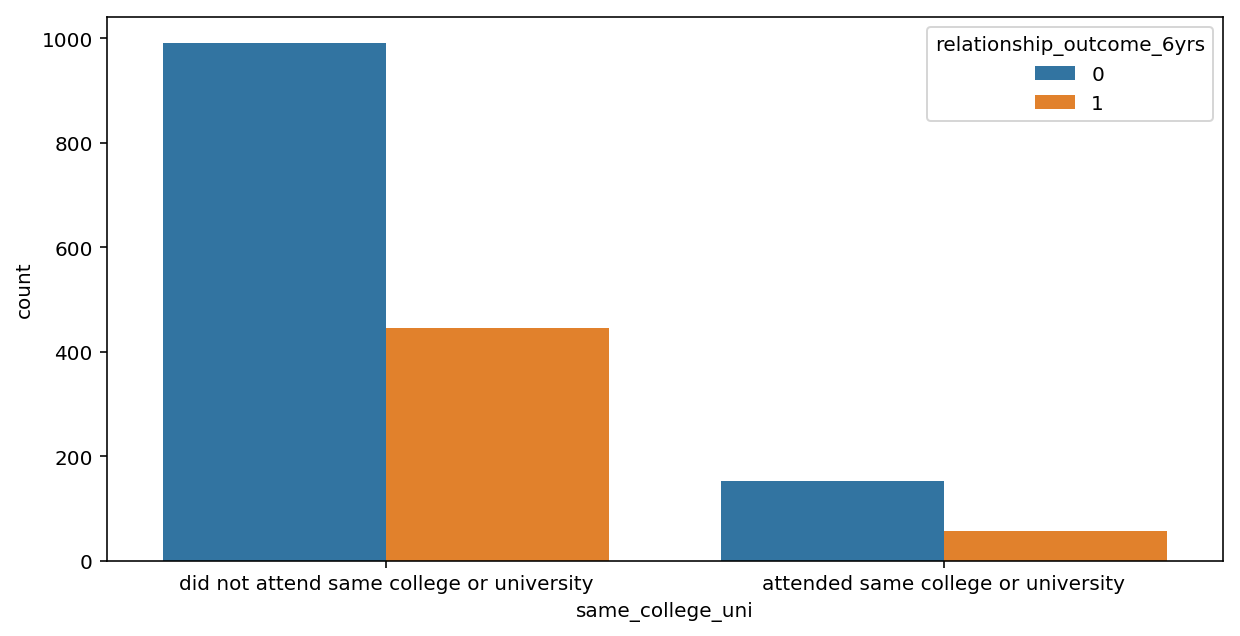

In [9]:
# same college uni doesnt affect relationship outcome
plt.figure(figsize=(10,5))
sns.countplot(x=couple_data_cat['same_college_uni'],hue=couple_data_cont['relationship_outcome_6yrs'])

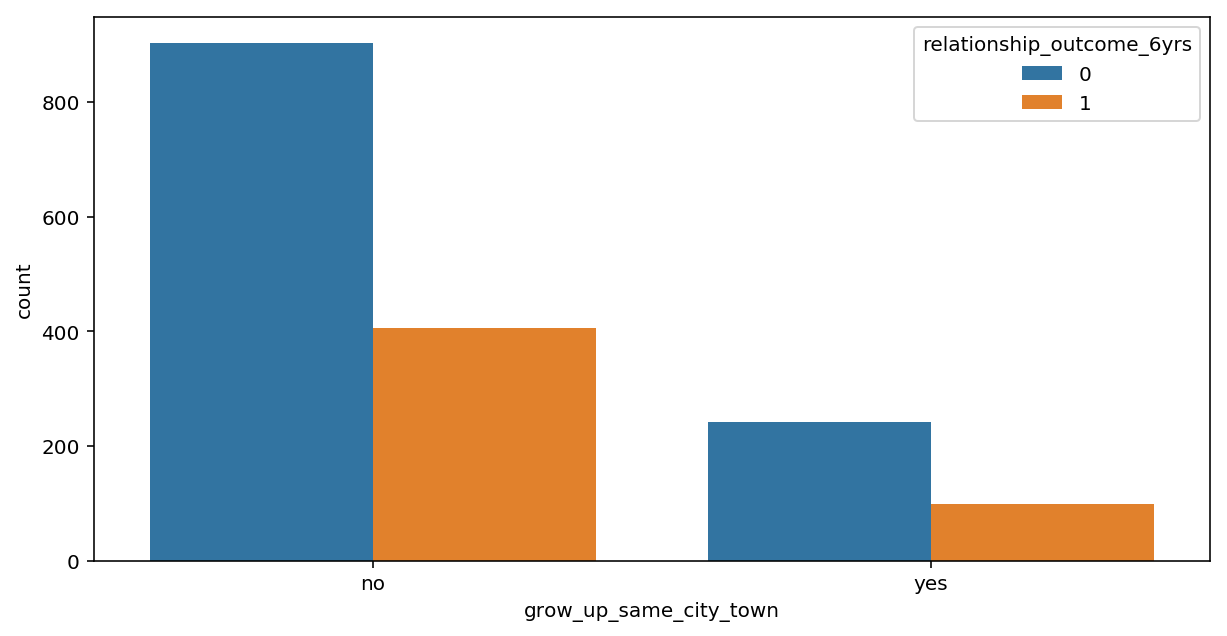

In [10]:
# grow_up_same_city_town doesnt affect relationship outcome
plt.figure(figsize=(10,5))
sns.countplot(x=couple_data_cat['grow_up_same_city_town'],hue=couple_data_cont['relationship_outcome_6yrs'])

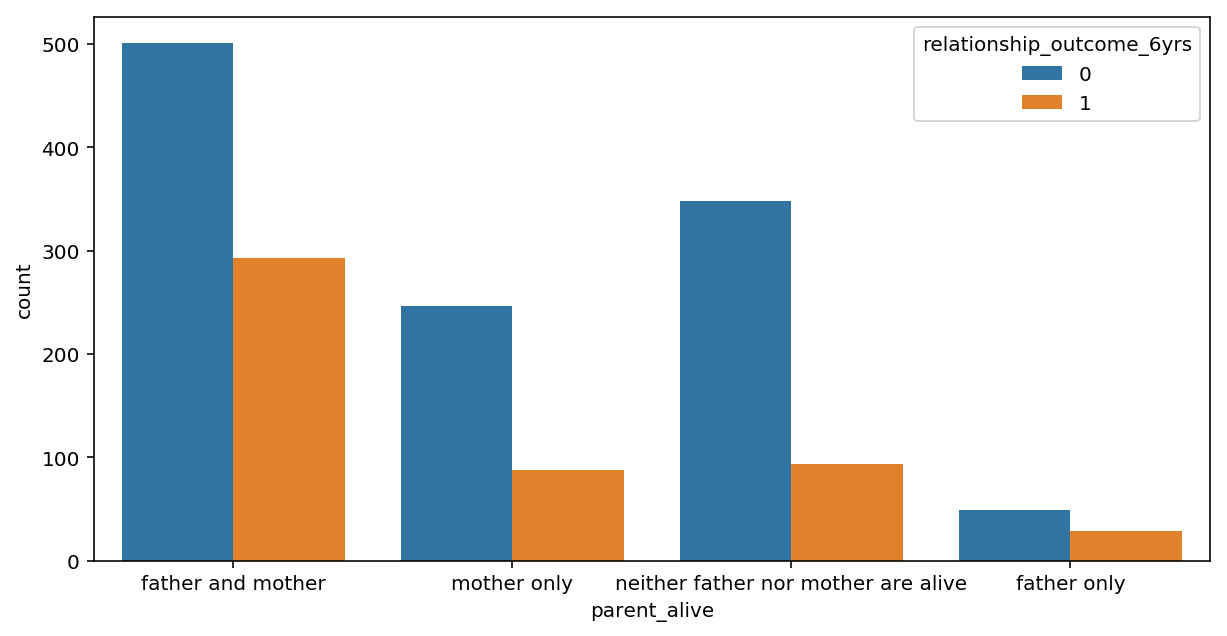

In [11]:
# parent_alive doesnt affect relationship outcome
plt.figure(figsize=(10,5))
sns.countplot(x=couple_data_cat['parent_alive'],hue=couple_data_cont['relationship_outcome_6yrs'])

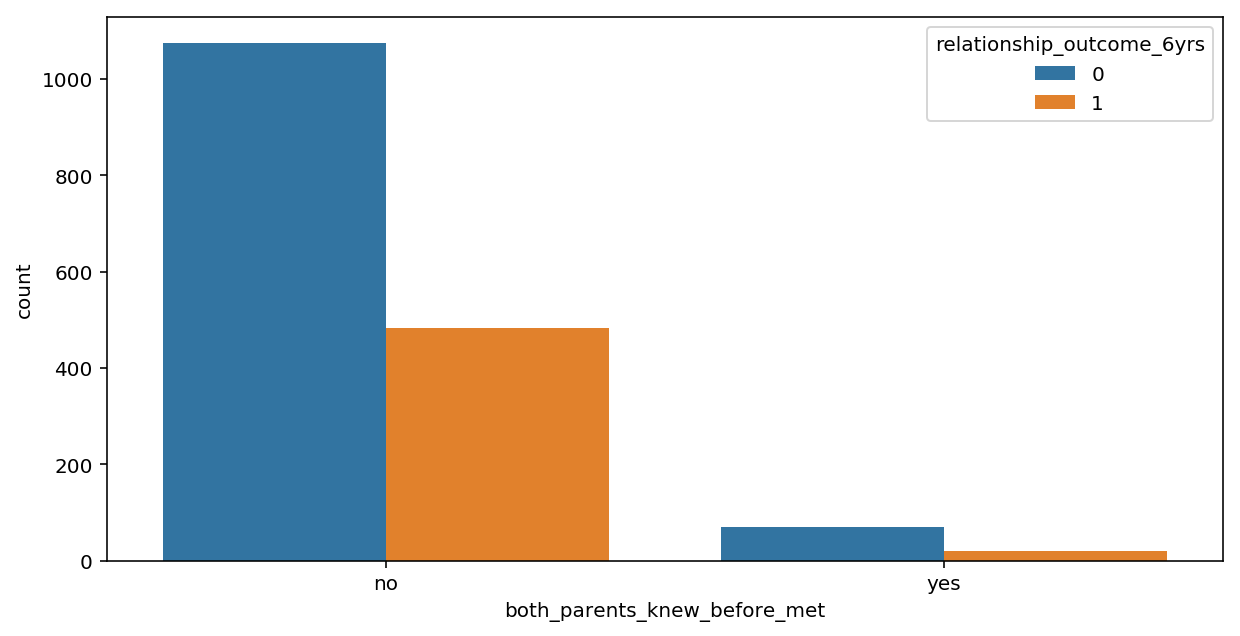

In [12]:
# both_parents_knew_before_met doesnt affect relationship outcome
plt.figure(figsize=(10,5))
sns.countplot(x=couple_data_cat['both_parents_knew_before_met'],hue=couple_data_cont['relationship_outcome_6yrs'])

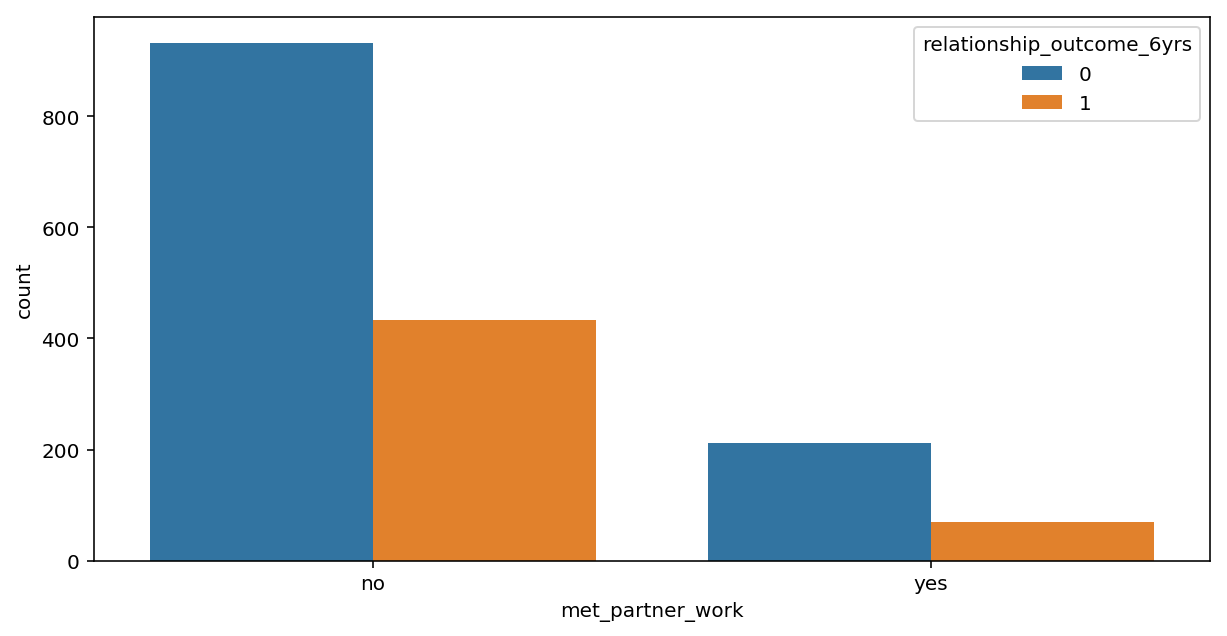

In [13]:
# met_partner_work doesnt affect relationship outcome
plt.figure(figsize=(10,5))
sns.countplot(x=couple_data_cat['met_partner_work'],hue=couple_data_cont['relationship_outcome_6yrs'])

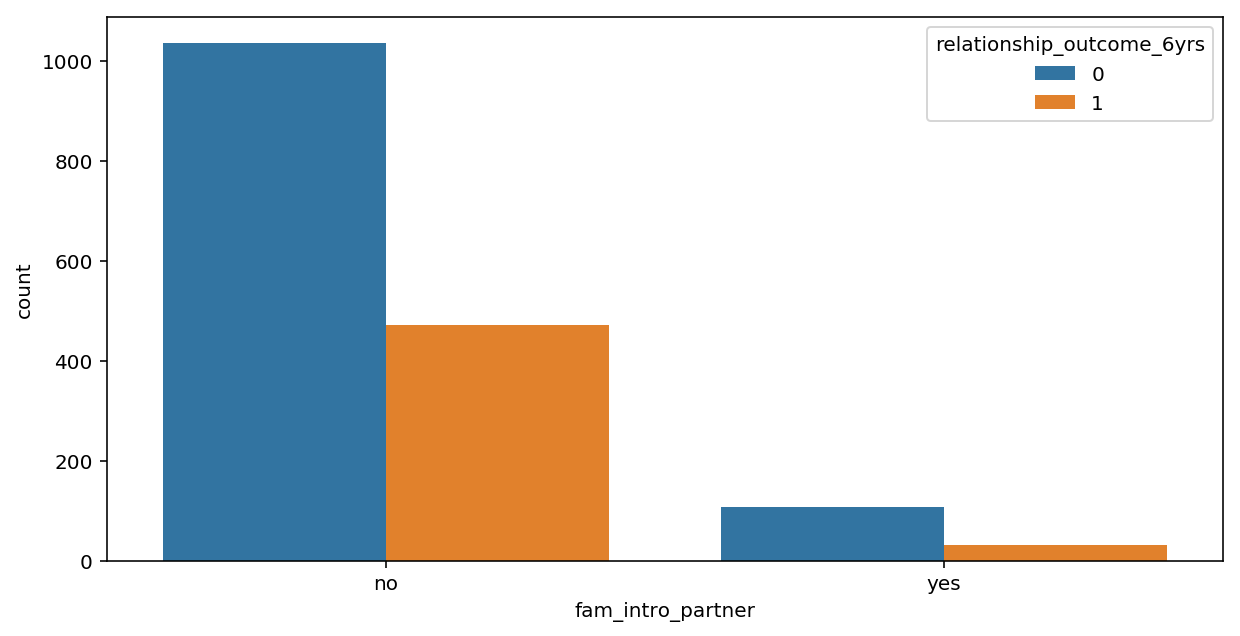

In [14]:
# fam_intro_partner doesnt affect relationship outcome
plt.figure(figsize=(10,5))
sns.countplot(x=couple_data_cat['fam_intro_partner'],hue=couple_data_cont['relationship_outcome_6yrs'])

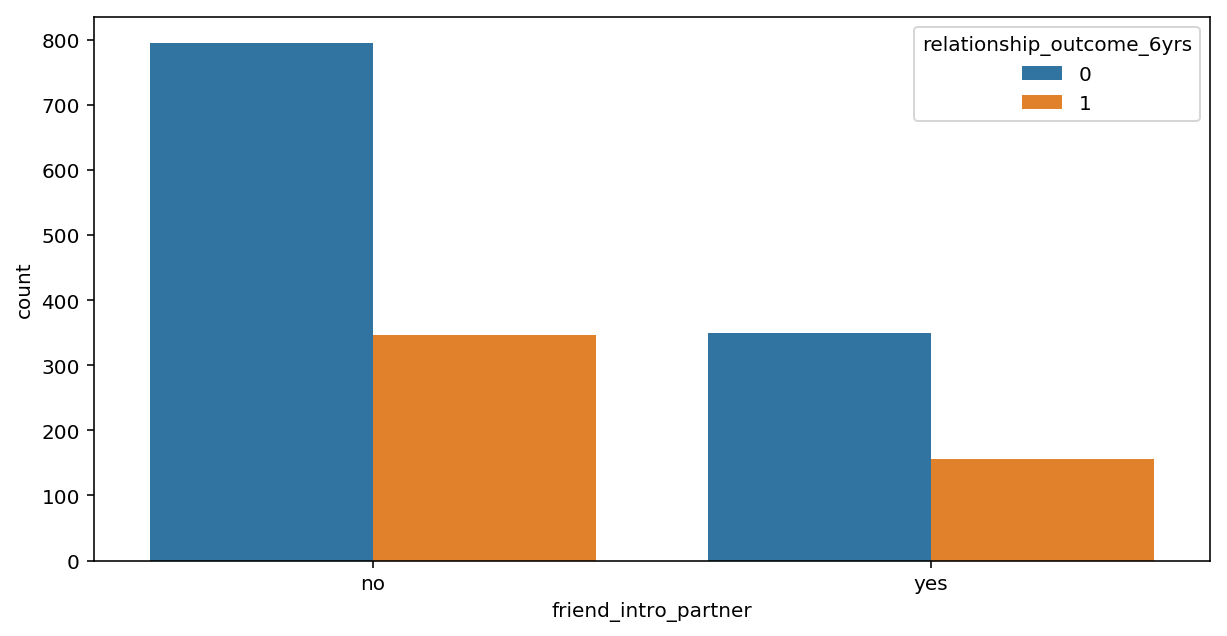

In [15]:
# friend_intro_partner doesnt affect relationship outcome
plt.figure(figsize=(10,5))
sns.countplot(x=couple_data_cat['friend_intro_partner'],hue=couple_data_cont['relationship_outcome_6yrs'])

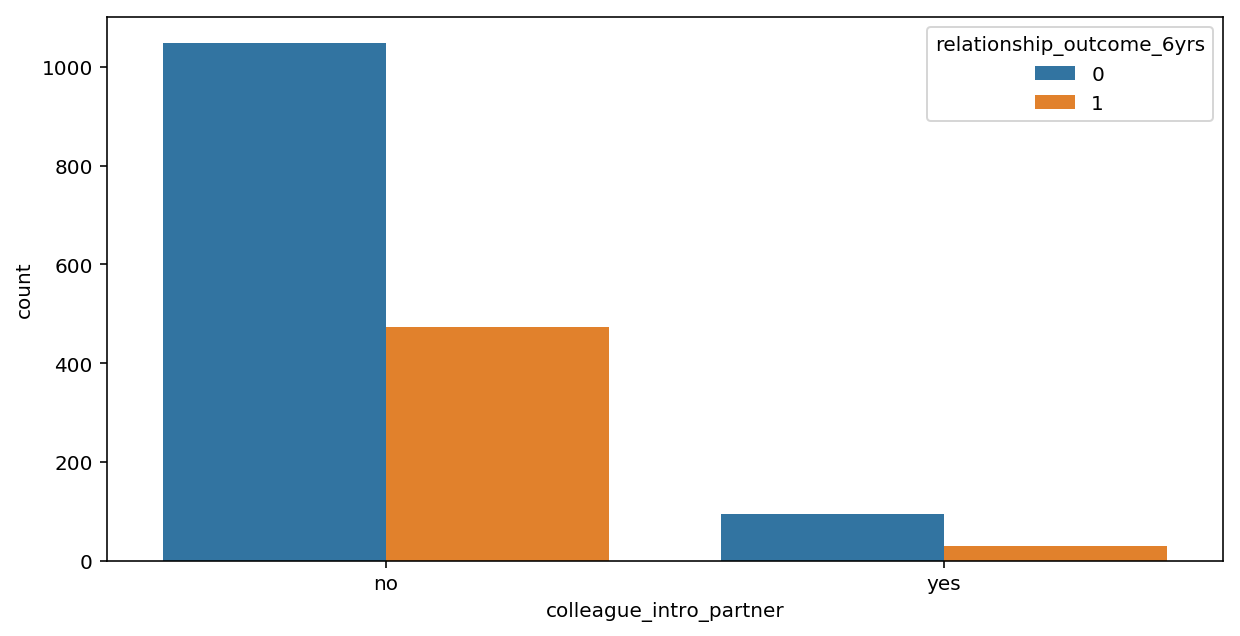

In [16]:
# colleague_intro_partner doesnt affect relationship outcome
plt.figure(figsize=(10,5))
sns.countplot(x=couple_data_cat['colleague_intro_partner'],hue=couple_data_cont['relationship_outcome_6yrs'])

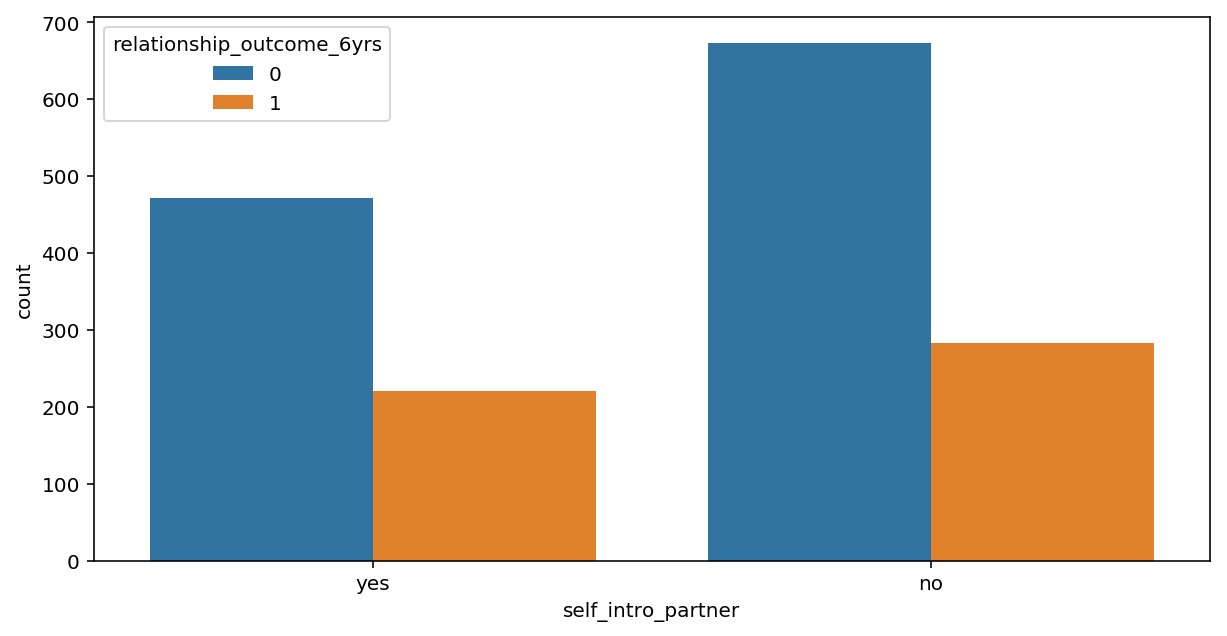

In [17]:
# self_intro_partner doesnt affect relationship outcome
plt.figure(figsize=(10,5))
sns.countplot(x=couple_data_cat['self_intro_partner'],hue=couple_data_cont['relationship_outcome_6yrs'])

In [18]:
# Len of categorical features
cat_cols = [col for col in couple_data_cat.columns if col.find('q24') >= 0]
cat_cols = np.array(cat_cols)
cat_cols.shape = (6,2)

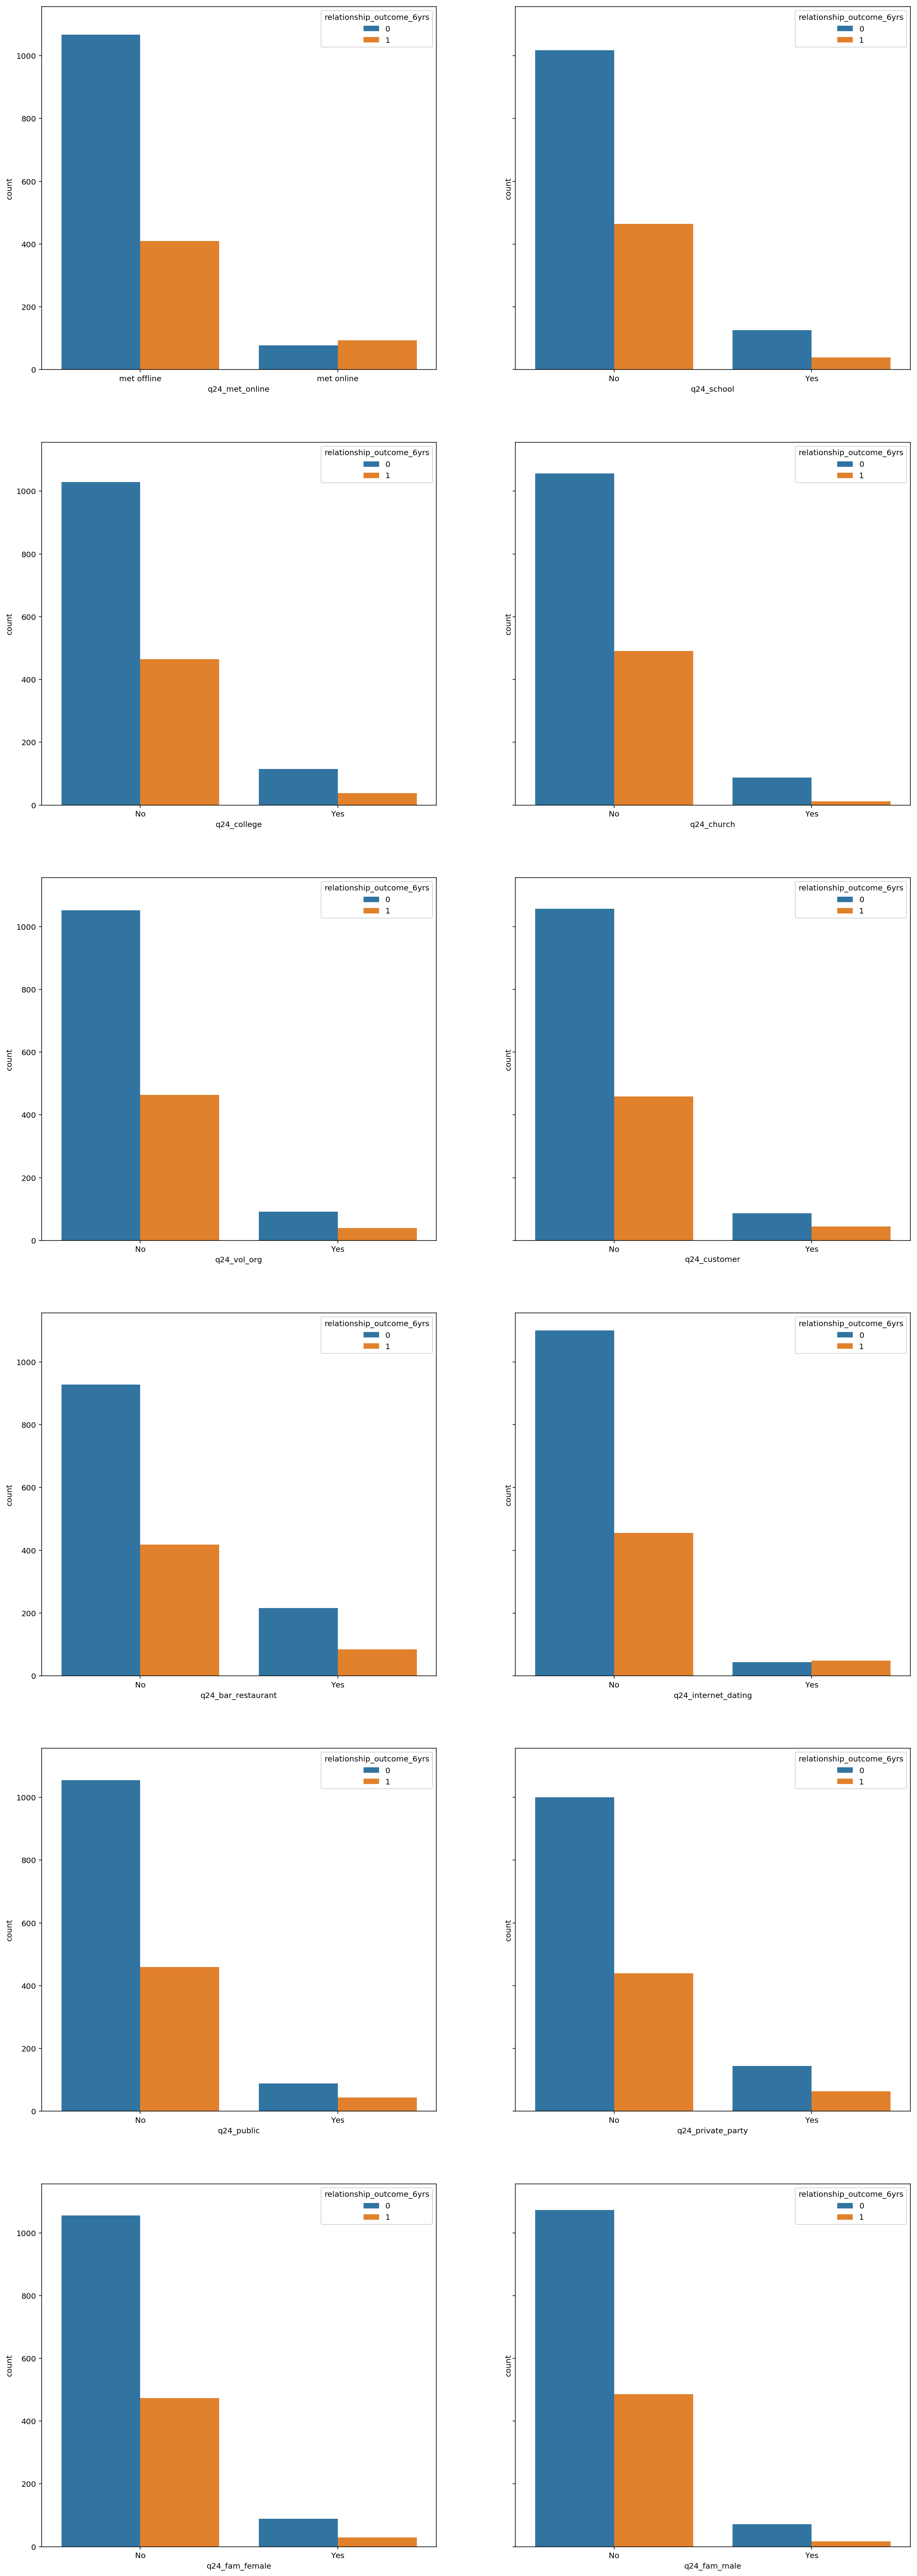

In [19]:
# Plot Categorical features against one another to observe distributions
# Shortlist those features with extremely low variance because they are unable to explain the changes in sale price
f, ax = plt.subplots(cat_cols.shape[0], cat_cols.shape[1], sharey=True, figsize=(20, cat_cols.shape[0]*10))

for r, row in enumerate(cat_cols):
    for i, col in enumerate(row):
        sns.countplot(x=couple_data[col], hue=couple_data_cont['relationship_outcome_6yrs'], ax=ax[r,i])

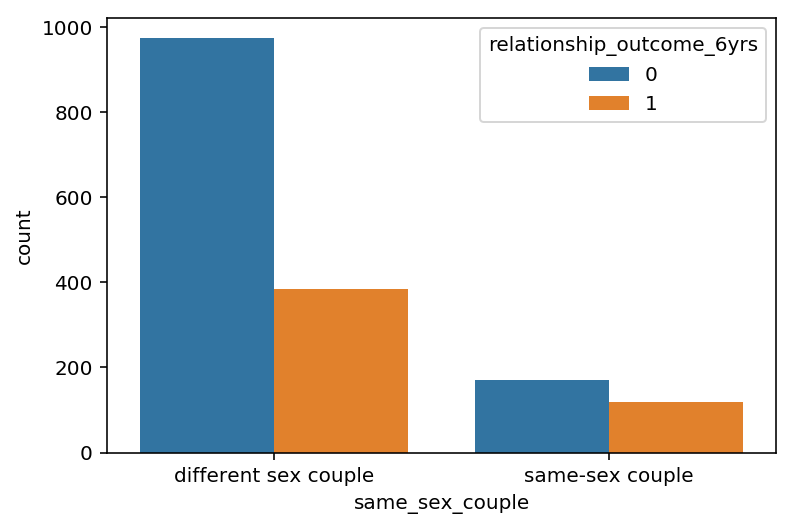

In [20]:
# same sex couple doesnt affect relationship outcome
sns.countplot(x=couple_data_cat['same_sex_couple'],hue=couple_data_cont['relationship_outcome_6yrs'])

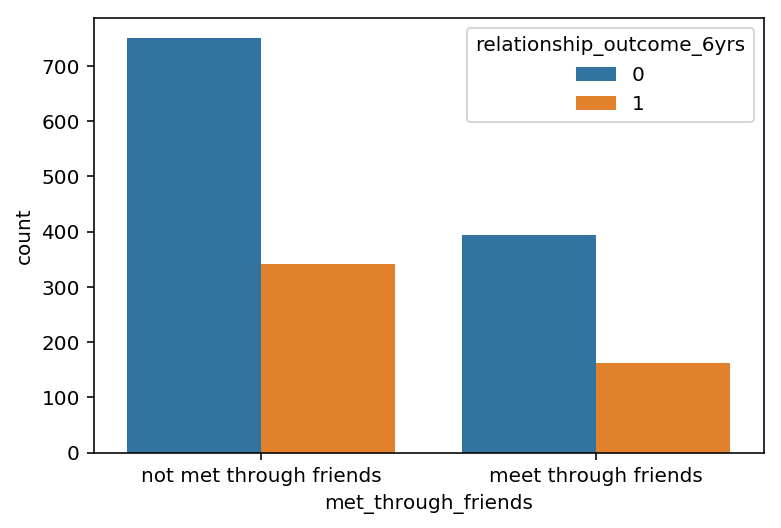

In [21]:
# met_through_friends doesnt affect relationship outcome
sns.countplot(x=couple_data_cat['met_through_friends'],hue=couple_data_cont['relationship_outcome_6yrs'])

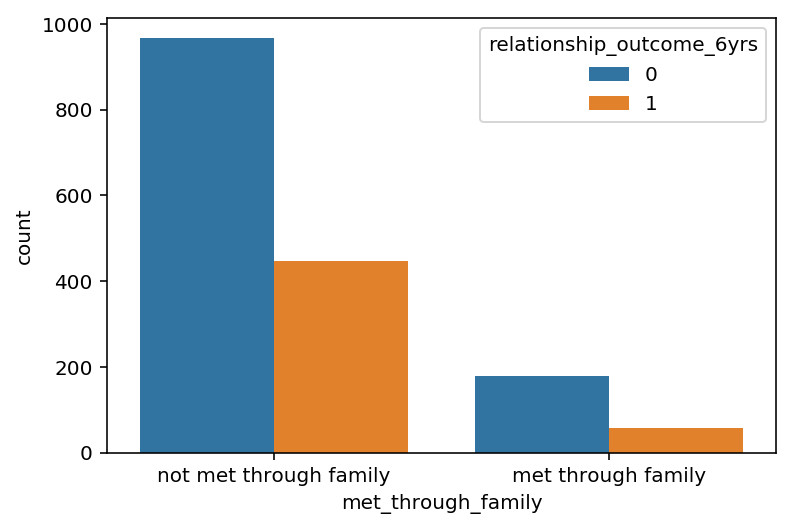

In [22]:
# met_through_family doesnt affect relationship outcome
sns.countplot(x=couple_data_cat['met_through_family'],hue=couple_data_cont['relationship_outcome_6yrs'])

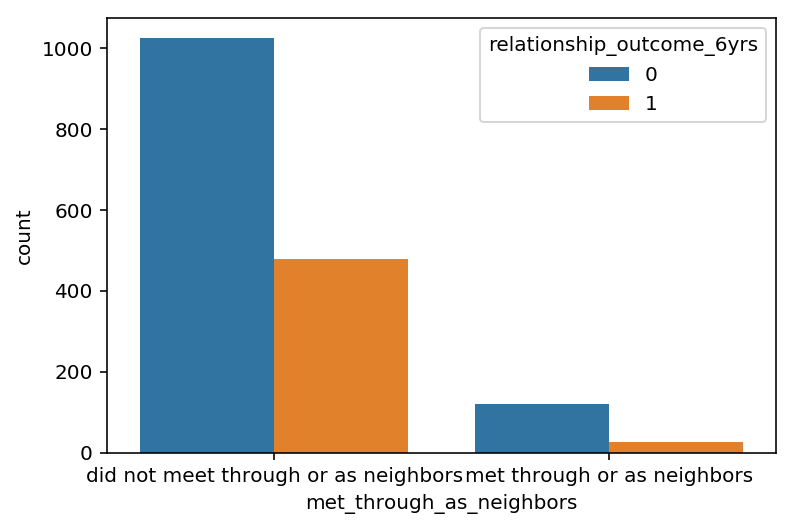

In [23]:
# met_through_as_neighbors doesnt affect relationship outcome
sns.countplot(x=couple_data_cat['met_through_as_neighbors'],hue=couple_data_cont['relationship_outcome_6yrs'])

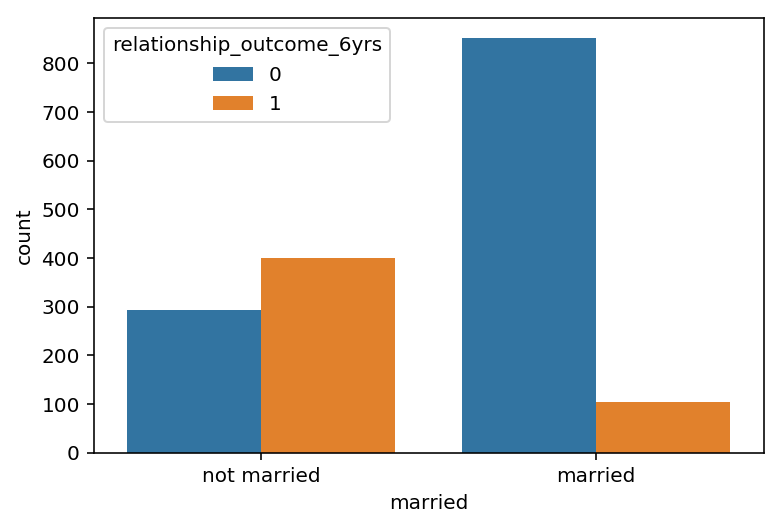

In [24]:
# married doesnt affect relationship outcome
sns.countplot(x=couple_data_cat['married'],hue=couple_data_cont['relationship_outcome_6yrs'])

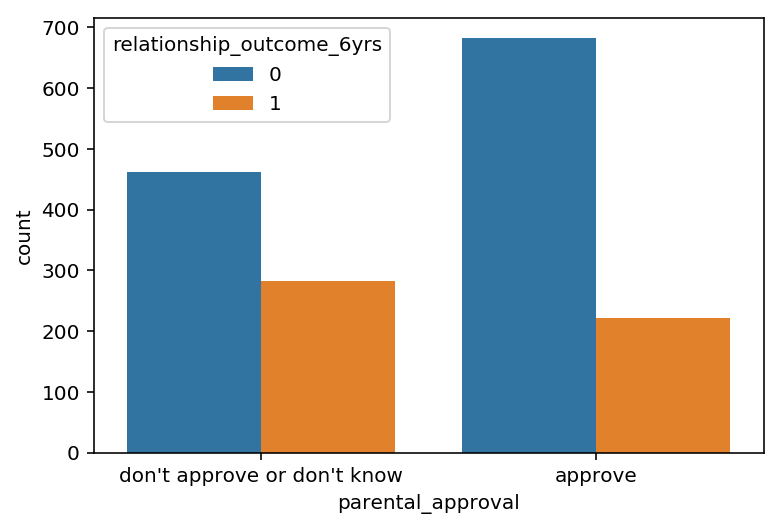

In [25]:
# parental_approval doesnt affect relationship outcome
sns.countplot(x=couple_data_cat['parental_approval'],hue=couple_data_cont['relationship_outcome_6yrs'])

/home/ec2-user/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c98074860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8c97ed49e8>]], dtype=object)

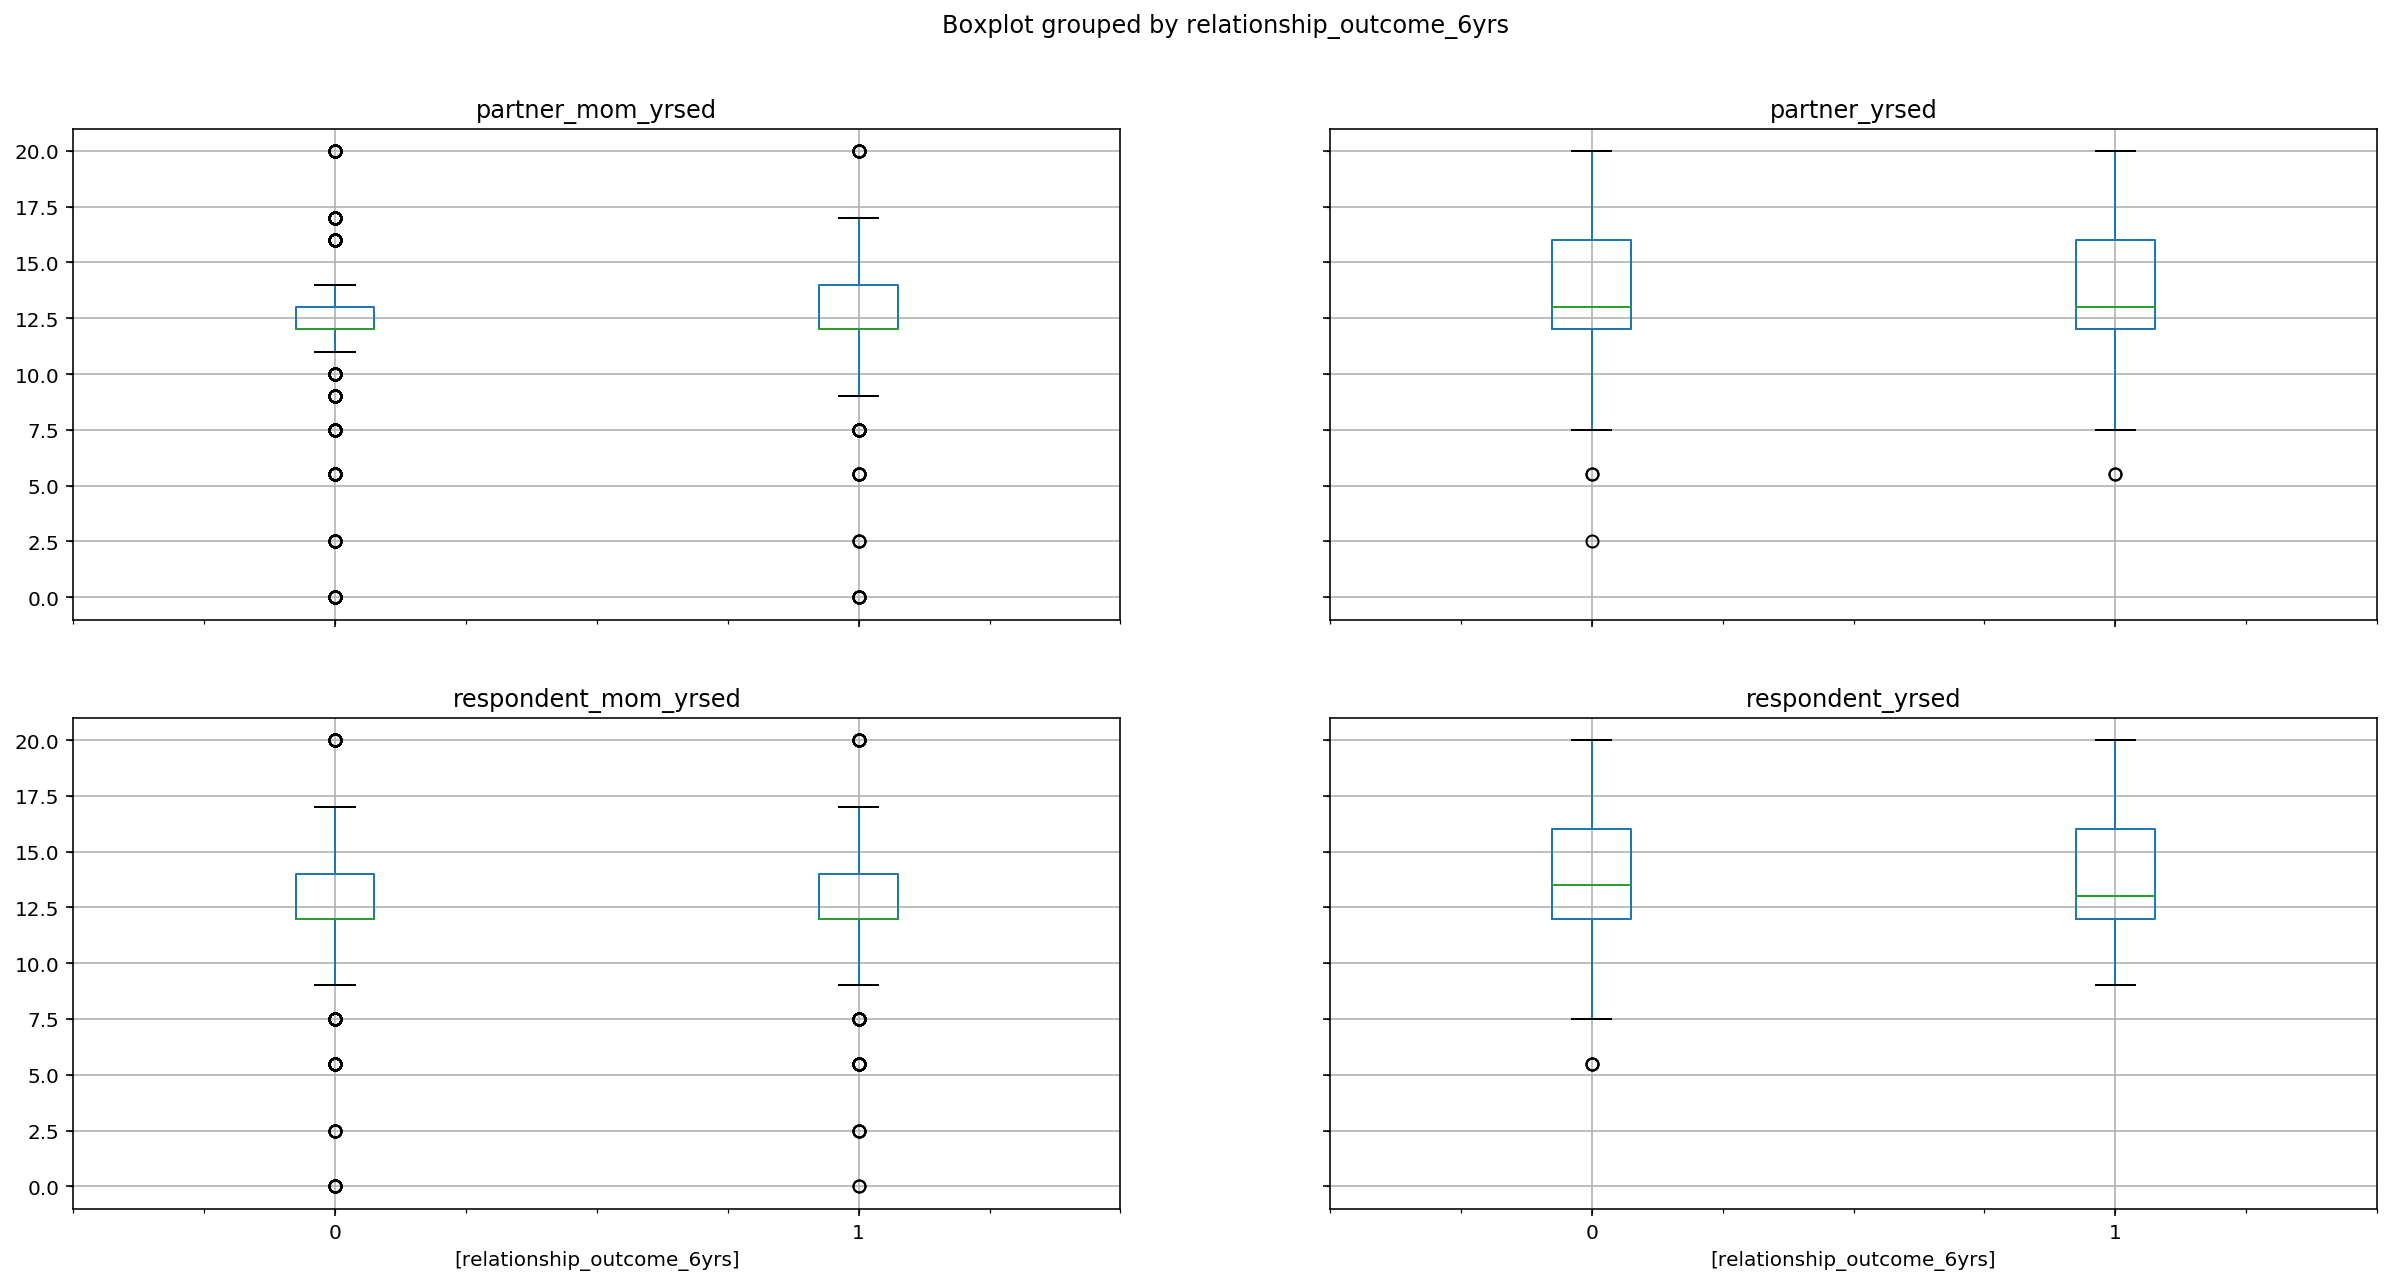

In [26]:
# What about years of education
cols = ['respondent_yrsed','partner_yrsed','partner_mom_yrsed','respondent_mom_yrsed','relationship_outcome_6yrs']
couple_data_cont[cols].boxplot(by='relationship_outcome_6yrs', figsize=(20,10))

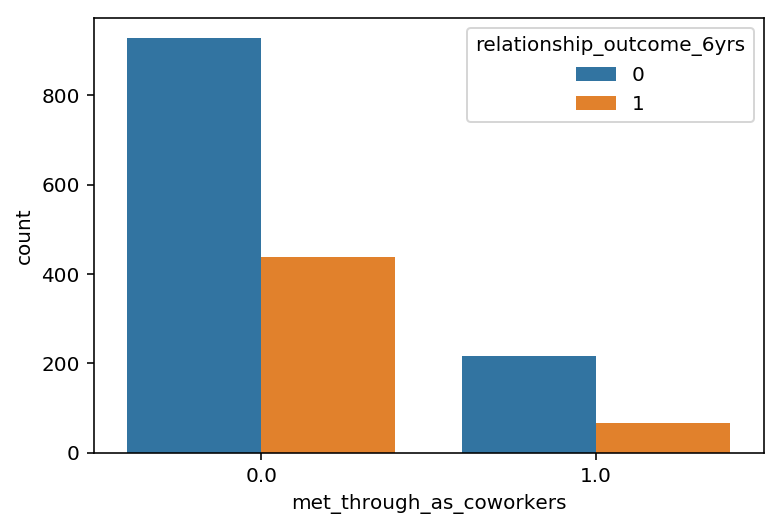

In [27]:
# Met through as co-workers and relationship outcome
sns.countplot(x='met_through_as_coworkers',hue='relationship_outcome_6yrs',data=couple_data_cont)

In [28]:
# Relationship seem to be due to imbalance data
# Resample Data for more accurate picture of relationships
# Convert categorical into dummies
import patsy
f = 'relationship_outcome_6yrs ~ ' + ' + '.join([col for col in couple_data.columns if col != 'relationship_outcome_6yrs' and col != 'relationship_quality'])
y, X = patsy.dmatrices(f, data=couple_data, return_type='dataframe')

In [29]:
X.to_pickle('./couple_data_without_resample_predictors')
y.to_pickle('./couple_data_without_resample_target')

In [30]:
y_orig = y

In [31]:
y = y.values.ravel()

In [32]:
# Resample using SMOTE + Tomek
from imblearn.combine import SMOTETomek
smtomek = SMOTETomek(random_state=42)
X_st, y_st = smtomek.fit_sample(X, y)

In [33]:
X_st_df = pd.DataFrame(X_st, columns=[col for col in X.columns])
y_st_df = pd.DataFrame(y_st, columns=['relationship_outcome_6yrs'])
# make sure dummy columns for categorical values are all 0/1
for cat_col in couple_data_cat.columns:
    for dum_col in X_st_df.columns:
        if dum_col.find(cat_col) >= 0:
            X_st_df[dum_col] = X_st_df[dum_col].astype('int64')

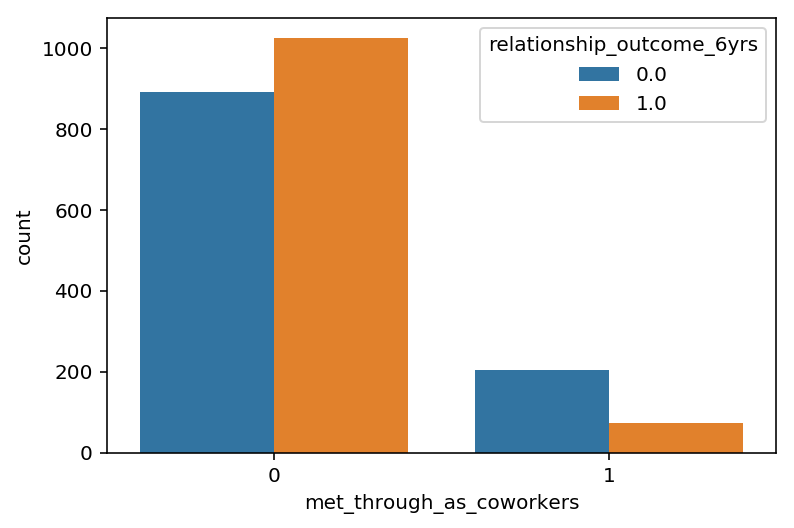

In [34]:
# Resample then plot again
X_st_df.met_through_as_coworkers = X_st_df.met_through_as_coworkers.astype('int64')
sns.countplot(x=X_st_df['met_through_as_coworkers'], hue=y_st_df['relationship_outcome_6yrs'])

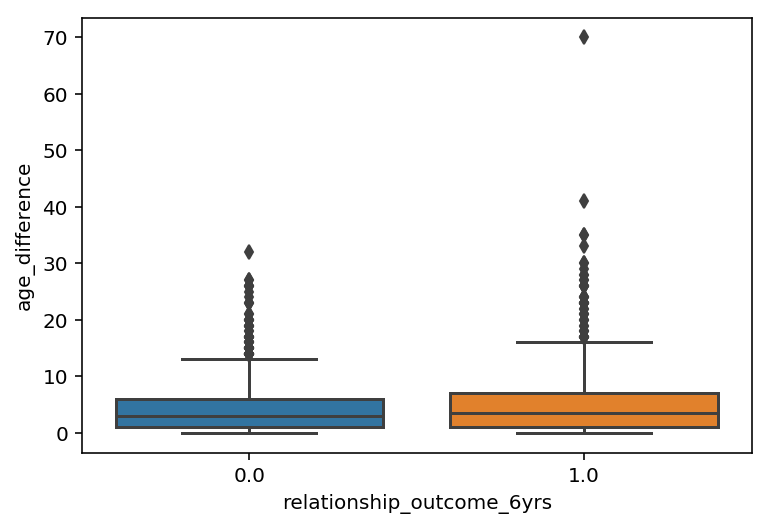

In [35]:
# Check whether age is able to classify relationship outcome
X_st_df.age_difference = X_st_df.age_difference.astype('int64')
st_df = pd.concat([X_st_df,y_st_df], axis=1)
sns.boxplot(x="relationship_outcome_6yrs", y="age_difference", data=st_df)

In [36]:
# Impute Extreme Outlier as Median Age
median_age = X_st_df.age_difference.median()
index = X_st_df[X_st_df.age_difference > 50].index
X_st_df.age_difference.loc[index] = median_age

/home/ec2-user/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c853ac4e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8c8525b5f8>]], dtype=object)

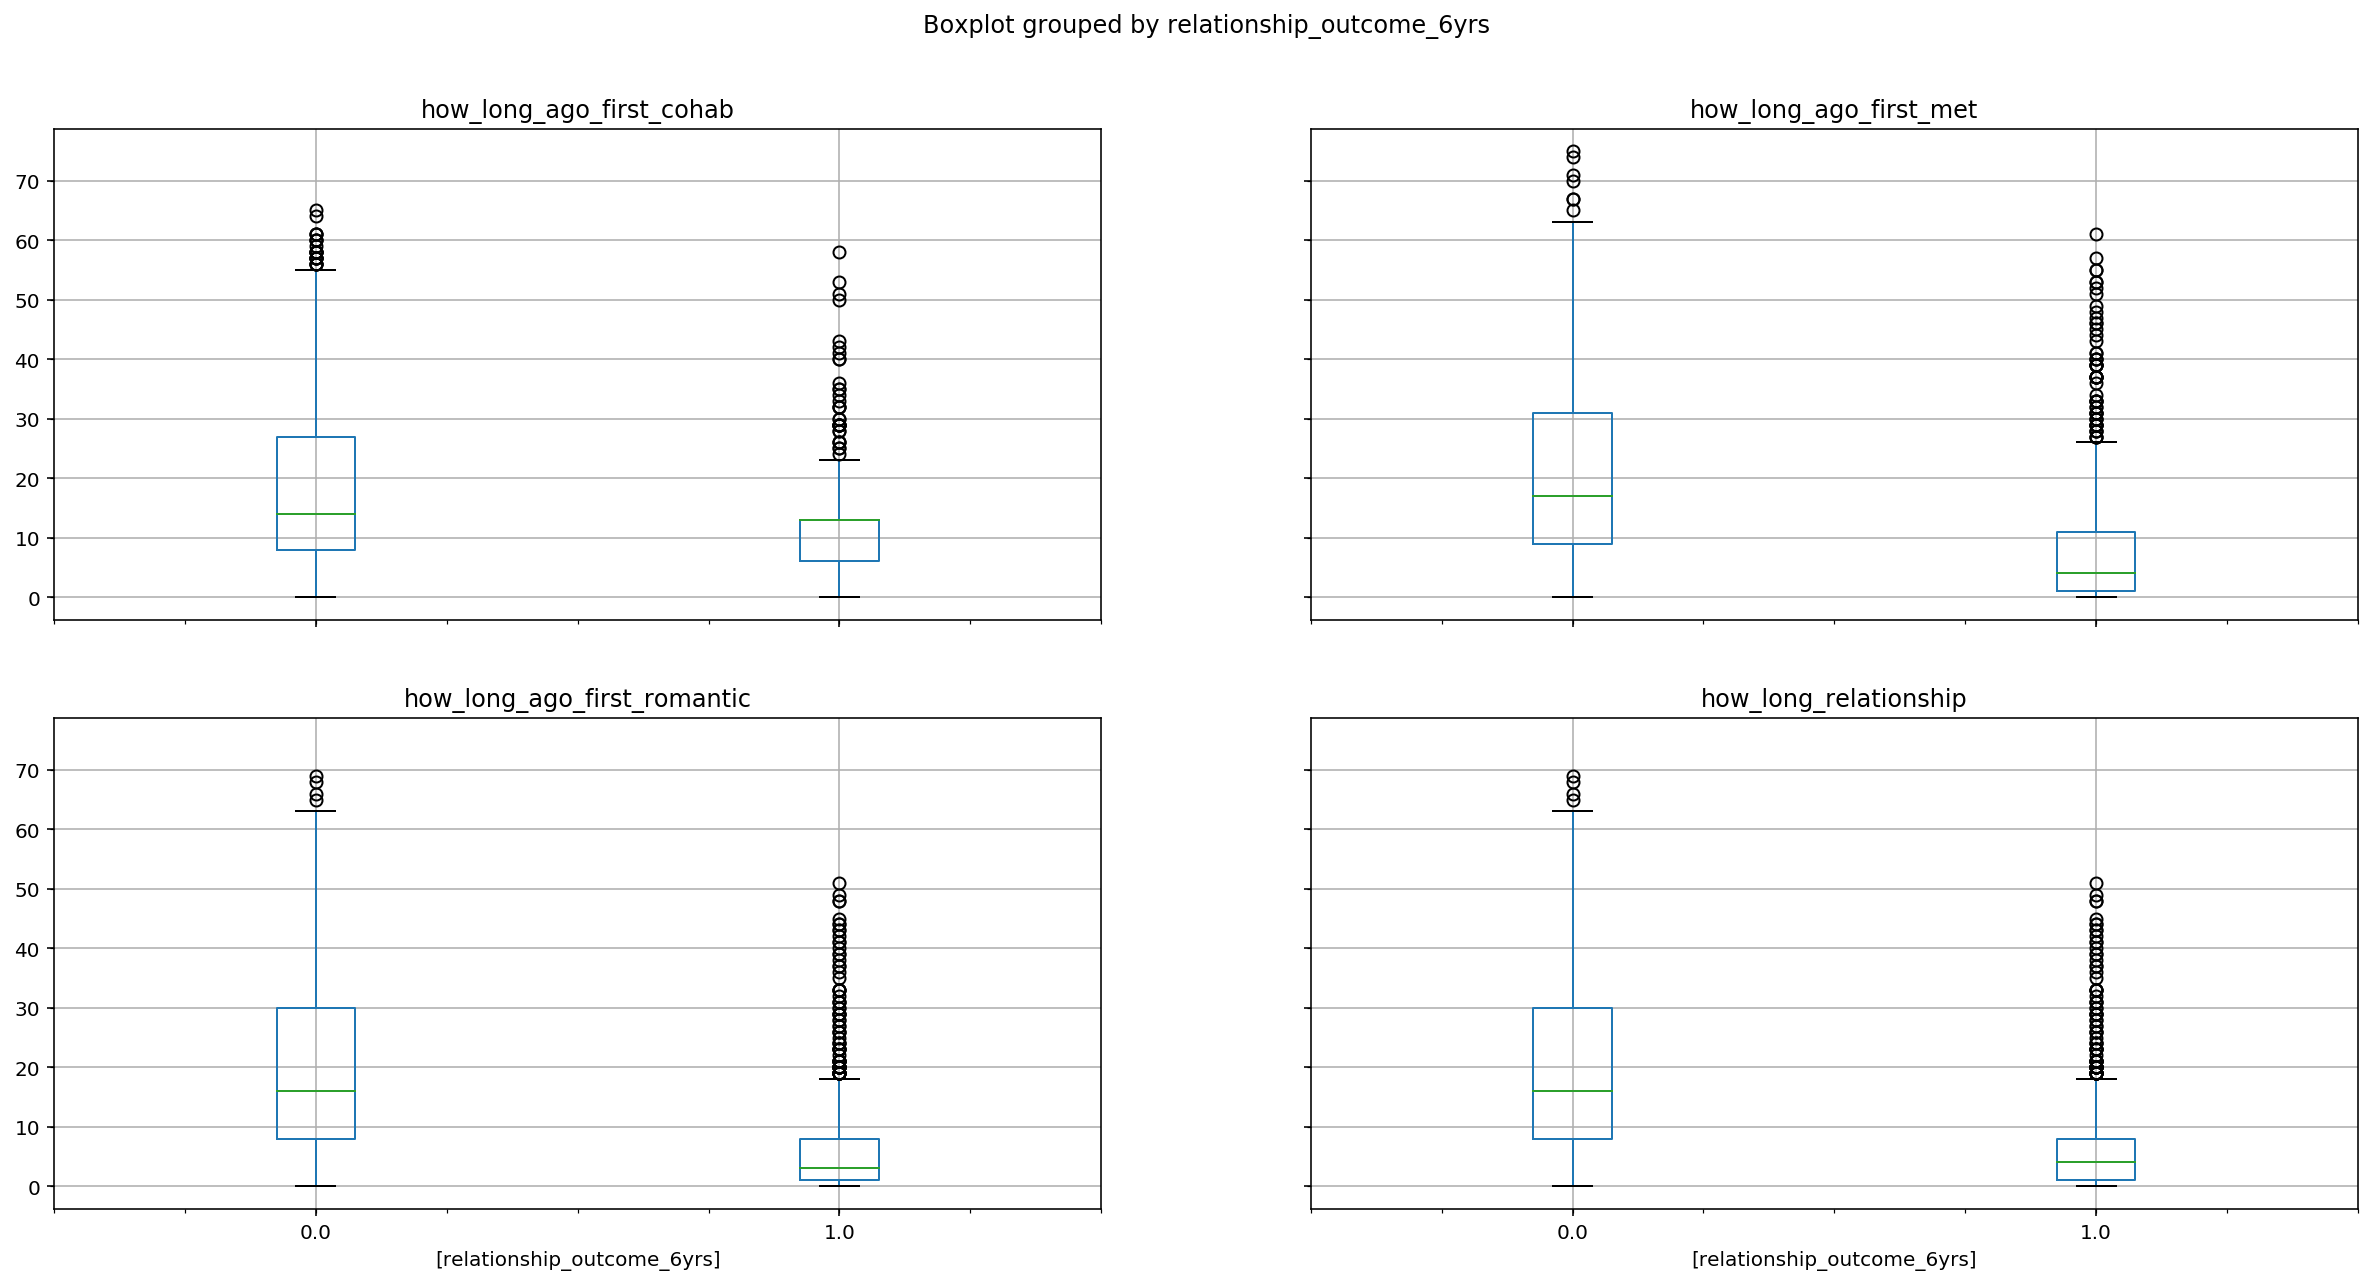

In [37]:
# How long ago first met, how long ago first romantic, how long ago first cohab, how long relationship
how_long_cols = ['how_long_ago_first_met','how_long_ago_first_romantic',
                 'how_long_ago_first_cohab','how_long_relationship']
for col in how_long_cols:
    X_st_df[col] = X_st_df[col].astype('int64')
st_df = pd.concat([X_st_df[how_long_cols],y_st_df], axis=1)
st_df.boxplot(by='relationship_outcome_6yrs', figsize=(20,10))

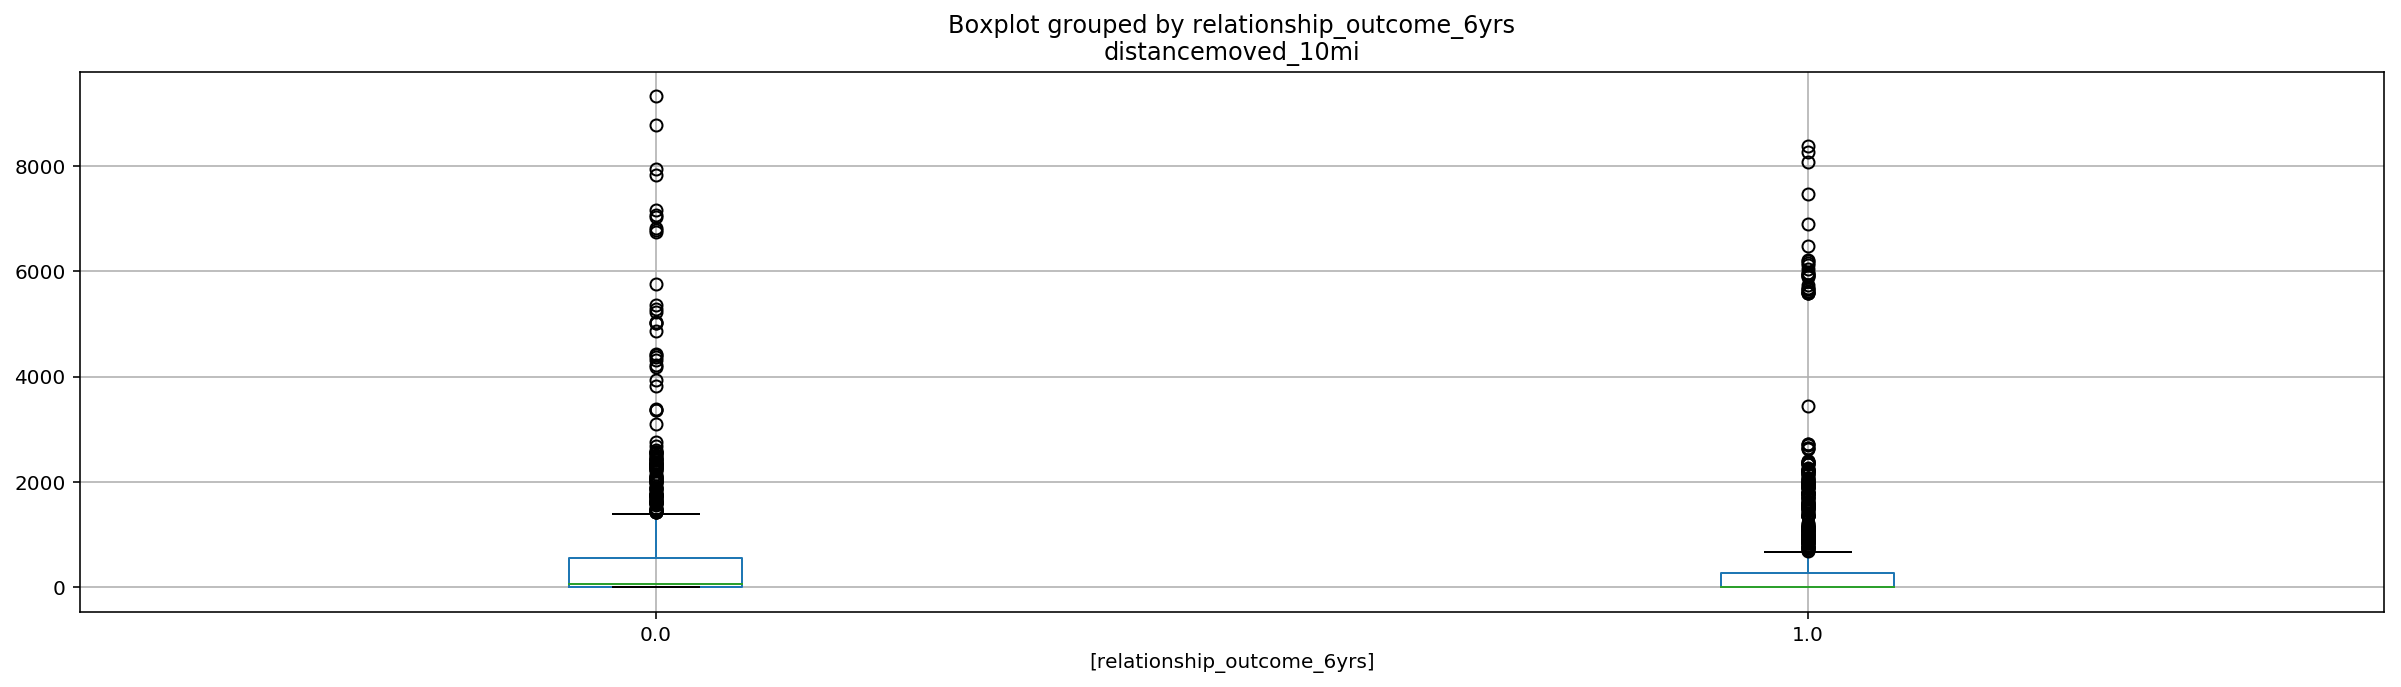

In [38]:
# Distance in Miles between resp home town and current home, to nearest 10 mi 
temp_cols = ['distancemoved_10mi']
st_df = pd.concat([X_st_df[temp_cols],y_st_df], axis=1)
st_df.boxplot(by='relationship_outcome_6yrs', figsize=(20,5))

In [39]:
def gen_ratio(inc_list,ratio_list=[]):
    
    st_list = inc_list.copy()
    # recursive loop to return ratio list once all pairs in st list is exhausted
    if len(st_list) == 0:
        return ratio_list
    else:
        for i in range(0,len(st_list)):
            lvlone = st_list[i][0][0]
            lvltwo = st_list[i][0][1]
            count = st_list[i][1]

            # Search for corresponding lvlone but opposite lvltwo
            for cor_i in range(0,len(st_list)):
                cor_lvlone = st_list[cor_i][0][0]
                cor_lvltwo = st_list[cor_i][0][1]
                cor_count = st_list[cor_i][1]
                
                # if matched pairs, compute ratio
                if cor_lvlone == lvlone and cor_lvltwo != lvltwo:
                    
                    # total number of breakups divide by total couple count
                    total_count = cor_count + count
                    if lvltwo == 1:
                        breakup_count = count
                    else:
                        breakup_count = cor_count
                    ratio = breakup_count / float(total_count)
                    ratio_list.append((lvlone, ratio))
                    
                    # remove pairs from list
                    del_values = [st_list[i],st_list[cor_i]]
                    st_list = [v for v in st_list if v not in del_values]
                    
                    # call function again with new st list
                    return gen_ratio(st_list,ratio_list)
    
        # if no matched pairs, return single value
        if lvltwo == 1:
            ratio_list.append((lvlone, 1.0))
        else:
            ratio_list.append((lvlone, 0.0))
        
        # remove single value from list
        del_values = [st_list[i]]
        st_list = [v for v in st_list if v not in del_values]
        
        # call function again with new st list
        return gen_ratio(st_list,ratio_list)    

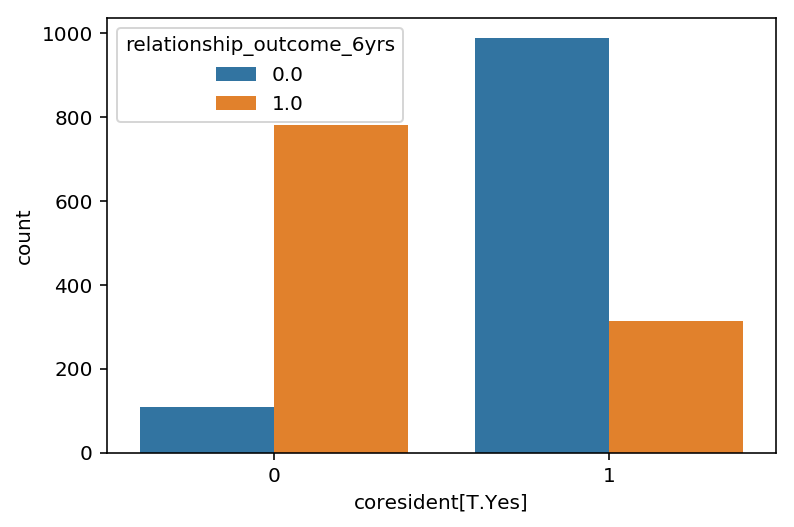

In [40]:
# Coresident
sns.countplot(x=X_st_df['coresident[T.Yes]'], hue=y_st_df['relationship_outcome_6yrs'])

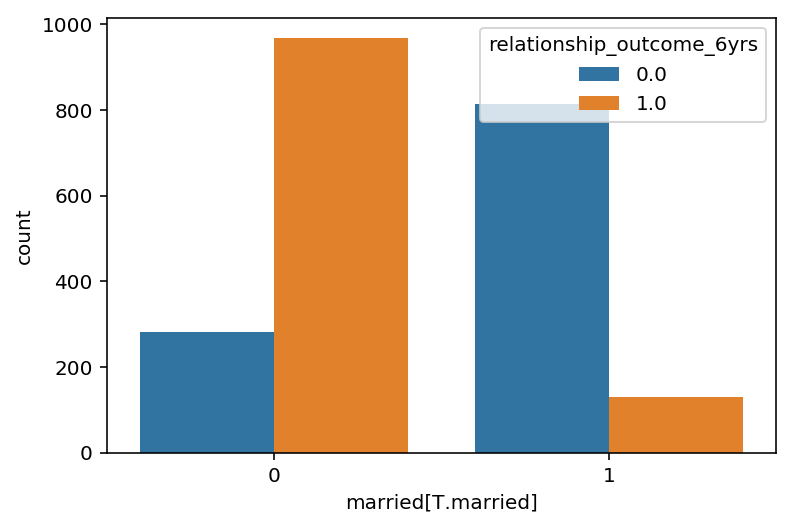

In [41]:
# Married
sns.countplot(x=X_st_df['married[T.married]'], hue=y_st_df['relationship_outcome_6yrs'])

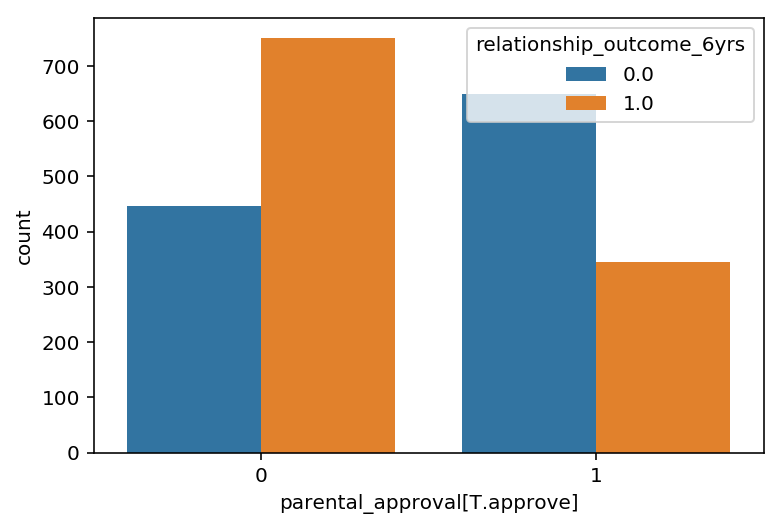

In [42]:
# Parental Approval
sns.countplot(x=X_st_df['parental_approval[T.approve]'], hue=y_st_df['relationship_outcome_6yrs'])

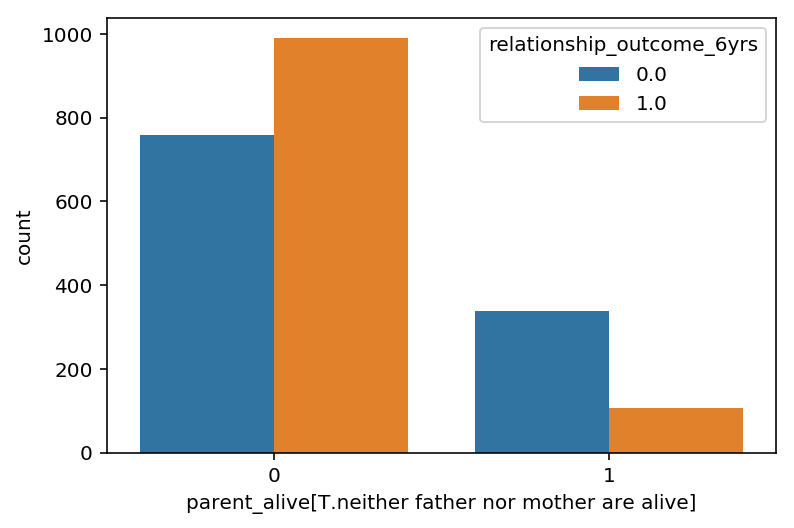

In [43]:
# Condition of Parents of respondent
sns.countplot(x=X_st_df['parent_alive[T.neither father nor mother are alive]'], hue=y_st_df['relationship_outcome_6yrs'])

In [44]:
X_st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 59 columns):
Intercept                                                                       2192 non-null float64
higher_income_earner[T.female_earn_more]                                        2192 non-null int64
higher_income_earner[T.male_earn_more]                                          2192 non-null int64
same_high_school[T.same high school]                                            2192 non-null int64
same_college_uni[T.did not attend same college or university]                   2192 non-null int64
grow_up_same_city_town[T.yes]                                                   2192 non-null int64
both_parents_knew_before_met[T.yes]                                             2192 non-null int64
parent_alive[T.father only]                                                     2192 non-null int64
parent_alive[T.mother only]                                                     2192 non-nu

In [45]:
X_st_df[['higher_income_earner[T.female_earn_more]']] = X_st_df[['higher_income_earner[T.female_earn_more]']].astype('int64')
X_st_df.age_difference = X_st_df.age_difference.astype('int64')
X_st_df.respondent_yrsed = X_st_df.respondent_yrsed.astype('int64')
X_st_df.partner_yrsed = X_st_df.partner_yrsed.astype('int64')
X_st_df.partner_mom_yrsed = X_st_df.partner_mom_yrsed.astype('int64')
X_st_df.respondent_mom_yrsed = X_st_df.respondent_mom_yrsed.astype('int64')

In [46]:
X_st_df.describe()

,Intercept,higher_income_earner[T.female_earn_more],higher_income_earner[T.male_earn_more],same_high_school[T.same high school],same_college_uni[T.did not attend same college or university],grow_up_same_city_town[T.yes],both_parents_knew_before_met[T.yes],parent_alive[T.father only],parent_alive[T.mother only],parent_alive[T.neither father nor mother are alive],...,how_long_ago_first_met,how_long_ago_first_romantic,how_long_ago_first_cohab,how_long_relationship,age_difference,met_through_as_coworkers,respondent_yrsed,partner_yrsed,partner_mom_yrsed,respondent_mom_yrsed
count,2192.0,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,...,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000
mean,1.0,0.348540,0.366332,0.098540,0.850821,0.161496,0.038777,0.033759,0.156478,0.203011,...,14.643704,13.182938,14.919708,13.197080,4.799270,0.125912,13.978558,13.837135,12.270529,12.406022
std,0.0,0.476617,0.481912,0.298112,0.356346,0.368072,0.193108,0.180650,0.363391,0.402332,...,14.856298,14.295979,12.214197,14.291592,5.080353,0.331826,2.318145,2.270287,2.864072,2.898609
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,7.000000,2.000000,1.000000,0.000000,12.000000,12.000000,12.000000,12.000000
50%,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,8.000000,13.000000,8.000000,3.000000,0.000000,13.000000,13.000000,12.000000,12.000000
75%,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.000000,19.000000,17.000000,19.000000,6.000000,0.000000,16.000000,16.000000,13.000000,14.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,75.000000,69.000000,65.000000,69.000000,41.000000,1.000000,20.000000,20.000000,20.000000,20.000000


In [47]:
X_st_df.to_pickle('./couple_data_predictors')
y_st_df.to_pickle('./couple_data_target')

In [50]:
y_st_df.relationship_outcome_6yrs.value_counts()

0.0    1096
1.0    1096
Name: relationship_outcome_6yrs, dtype: int64

In [54]:
y_orig.relationship_outcome_6yrs.value_counts()
503/float(1144)

0.4396853146853147

In [58]:
# Get reverse imbalance dataset
merge_df = pd.concat([X_st_df,y_st_df],axis=1)
sub_df = merge_df[merge_df.relationship_outcome_6yrs == 0]
us_df = sub_df.sample(frac=0.44, random_state=42)
remerge_df = pd.concat([merge_df[merge_df.relationship_outcome_6yrs == 1], us_df], axis=0)

(1578, 60)

In [63]:
remerge_df.drop(labels=['relationship_outcome_6yrs'],axis=1).to_pickle('./couple_data_rev_imbal_predictors')
remerge_df.relationship_outcome_6yrs.to_pickle('./couple_data_rev_imbal_target')